<a href="https://colab.research.google.com/github/vikramsharitas/PS-1-Project/blob/master/New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf

import os
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
df = pd.read_excel('/content/drive/My Drive/Data/Data/FutureTech_Sampledata.xlsx', parse_dates=['datetime'])
yval = df['RPM'] == 0
df['yval'] = yval
df = df[df['machineID']!=4]
length = len(df)

In [43]:
df.head(90000)

,datetime,machineID,Voltage,RPM,pressure,vibration,yval
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,False
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,False
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,False
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,False
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,False
...,...,...,...,...,...,...,...
43800,2016-01-01 02:00:00,5,162.964887,511.046527,153.187090,41.772148,False
43801,2016-01-01 03:00:00,5,136.402165,402.228972,152.191926,38.078241,False
43802,2016-01-01 04:00:00,5,181.426439,460.280665,142.451849,44.551477,False
43803,2016-01-01 05:00:00,5,178.261658,424.821800,156.228631,39.976910,False


In [44]:
def cal_hrs(length, yval):
  hoursto = np.zeros(length)
  hourssince = np.zeros(length)
  l = len(yval)
  temp1 = None
  temp2 = None
  for i in range(length-1, -1, -1):
    if yval[i] == 1:
      temp1 = 1
      hoursto[(i)] = 0
      continue
    if temp1 == 1:
      hoursto[(i)] = hoursto[(i)+1] + 1
    else:
      hoursto[(i)] = None
    if yval[length-1-(i)] == 1:
      temp2 = 1
      hourssince[length-1-(i)] = 0
      continue
    if temp2 == 1:
      hourssince[length-1-(i)] = hourssince[length-1-(i)-1] + 1
    else:
      hourssince[length-1-(i)] = None
  return hoursto, hourssince

In [45]:
since = np.zeros(0)
to = np.zeros(0)

for mid in df.machineID.unique():
  l = len(df[df.machineID == mid])
  yval = df.yval[df.machineID == mid].values

  hrsince = np.zeros(l)
  hrsto = np.zeros(l)

  temp1 = -1
  temp2 = -1
  
  for i in range(0, l):
    if yval[i] == 1:
      temp1 = 1
      hrsince[i] == 0
    elif temp1 == 1:
      hrsince[i] = hrsince[i-1] + 1

    if yval[l-i-1] == 1:
      temp2 = 1
      hrsto[l-i-1] = 0
    elif temp2 == 1:
      hrsto[l-i-1] = hrsto[l-i] + 1

  temp1 = -1
  temp2 = -1

  for i in range(0, l):
    if hrsto[i] == 0 and hrsto[i-1] == 0:
      temp2 = 1
      hrsto[i] = 720
    elif temp2 == 1:
      hrsto[i] = hrsto[i-1] - 1
    
    if hrsince[l-i-1] == 0 and hrsince[l-i] == 0:
      temp1 = 1
      hrsince[l-i-1] = 720
    elif temp1 == 1:
      hrsince[l-i-1] = hrsince[l-i] - 1

  since = np.append(since, hrsince)
  to = np.append(to, hrsto)

df['hourssince'] = since
df['hoursto'] = to

In [46]:
print(df)

                 datetime  machineID     Voltage  ...   yval  hourssince  hoursto
0     2015-01-01 06:00:00          1  176.217853  ...  False       642.0     79.0
1     2015-01-01 07:00:00          1  162.879223  ...  False       643.0     78.0
2     2015-01-01 08:00:00          1  170.989902  ...  False       644.0     77.0
3     2015-01-01 09:00:00          1  162.462833  ...  False       645.0     76.0
4     2015-01-01 10:00:00          1  157.610021  ...  False       646.0     75.0
...                   ...        ...         ...  ...    ...         ...      ...
43800 2016-01-01 02:00:00          5  162.964887  ...  False         2.0    719.0
43801 2016-01-01 03:00:00          5  136.402165  ...  False         3.0    718.0
43802 2016-01-01 04:00:00          5  181.426439  ...  False         4.0    717.0
43803 2016-01-01 05:00:00          5  178.261658  ...  False         5.0    716.0
43804 2016-01-01 06:00:00          5  178.789197  ...  False         6.0    715.0

[35044 rows x 9

In [64]:
features_considered = ['datetime','machineID','Voltage','RPM','pressure','vibration','hourssince','hoursto']
features = df[features_considered]
# features.index = df.index
features.head()

,datetime,machineID,Voltage,RPM,pressure,vibration,hourssince,hoursto
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,642.0,79.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,643.0,78.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,644.0,77.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,645.0,76.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,646.0,75.0


In [74]:
TRAIN_SPLIT = 30000
dataset = features.values

In [49]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [50]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [51]:
def create_time_steps(length):
  return list(range(-length, 0))

In [52]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [76]:
past_history = 744
future_target = -1
STEP = 1
print(len(dataset))

35044


In [75]:
x_train_single, y_train_single = multivariate_data(dataset[:, 1:7], dataset[:, 7], 0,
                                                 TRAIN_SPLIT-future_target+1, past_history,
                                                 future_target, STEP, True)
x_val_single, y_val_single = multivariate_data(dataset[:, 1:7], dataset[:, 7],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP, True)
for i in y_train_single:
  if i > 4000:
    print('we got fucked')

In [70]:
print(x_train_single[0,0])
print(y_train_single[0])

[1 176.217853 418.5040782 113.0779355 45.08768576 642.0]
201.0


In [77]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single.astype(np.float32), y_train_single.astype(np.float32)))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single.astype(np.float32), y_val_single.astype(np.float32)))
val_data_single = val_data_single.batch(BATCH_SIZE)

In [78]:
tf.keras.backend.clear_session()
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.Flatten())
single_step_model.add(tf.keras.layers.Dense(600,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(400,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(200,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(100,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(64,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(16,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(4,activation='relu'))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-8), loss=tf.keras.losses.MeanSquaredError())

In [72]:
EVALUATION_INTERVAL = 300
EPOCHS = 200

In [85]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                          validation_data=val_data_single)

Epoch 1/200
458/458 [==============================] - 3s 6ms/step - loss: 107110.7812 - val_loss: 55516.4414
Epoch 2/200
458/458 [==============================] - 3s 6ms/step - loss: 107086.6484 - val_loss: 55495.8906
Epoch 3/200
458/458 [==============================] - 3s 6ms/step - loss: 107062.8672 - val_loss: 55471.7734
Epoch 4/200
458/458 [==============================] - 3s 6ms/step - loss: 107038.9844 - val_loss: 55447.8789
Epoch 5/200
458/458 [==============================] - 3s 6ms/step - loss: 107016.1562 - val_loss: 55425.1875
Epoch 6/200
458/458 [==============================] - 3s 6ms/step - loss: 106992.5234 - val_loss: 55402.9453
Epoch 7/200
458/458 [==============================] - 3s 6ms/step - loss: 106969.7344 - val_loss: 55378.2812
Epoch 8/200
458/458 [==============================] - 3s 6ms/step - loss: 106945.9062 - val_loss: 55357.1211
Epoch 9/200
458/458 [==============================] - 3s 6ms/step - loss: 106922.8438 - val_loss: 55332.5391
Epoch 10/2

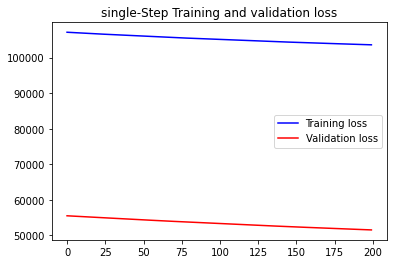

In [86]:
plot_train_history(single_step_history, 'single-Step Training and validation loss')

In [88]:
y1 = None
for x, y in val_data_single.take(100):
  if y1 != None:
    y0 = single_step_model.predict(x)
    print(y0)
    print(y)
#     z = [y1.numpy(), y[BUFFER_SIZE-1].numpy(), y0]
#     show_plot(z, 0, 'Prediction')
  y1 = y

[[481.49646]
 [479.41635]
 [476.92038]
 [473.29785]
 [475.69193]
 [489.3264 ]
 [486.6734 ]
 [474.06482]
 [484.82828]
 [474.33087]
 [469.69244]
 [463.337  ]
 [458.018  ]
 [466.72778]
 [464.96588]
 [474.92328]
 [470.71246]
 [458.22302]
 [474.35254]
 [466.29675]
 [471.61456]
 [471.87274]
 [462.92606]
 [472.2517 ]
 [480.2187 ]
 [480.10895]
 [461.6626 ]
 [457.378  ]
 [461.4905 ]
 [465.01724]
 [435.0946 ]
 [435.08173]
 [447.26624]
 [445.13934]
 [455.24518]
 [457.39197]
 [462.73956]
 [466.9502 ]
 [448.31876]
 [452.9546 ]
 [462.45026]
 [461.39166]
 [442.7779 ]
 [446.00668]
 [459.20306]
 [442.586  ]
 [453.13507]
 [475.70074]
 [459.0885 ]
 [463.82776]
 [451.37994]
 [468.27814]
 [461.90118]
 [452.66687]
 [454.93292]
 [451.84708]
 [452.24036]
 [442.40308]
 [451.31668]
 [456.11838]
 [448.43942]
 [439.20947]
 [457.97296]
 [467.32675]]
tf.Tensor(
[908. 907. 906. 905. 904. 903. 902. 901. 900. 899. 898. 897. 896. 895.
 894. 893. 892. 891. 890. 889. 888. 887. 886. 885. 884. 883. 882. 881.
 880. 879. 878